# Predicting CHURN for Bank Customers

**Goal**: Creating a supervised model that predicts which customers are likely to CHURN from a banks customer dataset. This information could then be used by the bank to e.g. target the specific customers in question for retention campaigns or other efforts to maintain their business.

**Dataset**: https://www.kaggle.com/datasets/santoshd3/bank-customers?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

/var/folders/fm/ybz48djs4wvgqr5vc1m27t3w0000gn/T/ipykernel_10738/2642478181.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Importing Dataset

In [2]:
df = pd.read_csv('../bank_churn_prediction/churn_modeling.csv')

# Understanding Columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dataset Description

**RowNumber** - (int) number representing the row in the dataset. Additional index, likely from export source

**CustomerId** - (int) unique ID identifying the customer within the banks data eco-system

**Surname** - (string) Surname of the customer

**CreditScore** - (int) The customers credit score 

**Geography** - (string) the customers Country of residence

**Gender** - (string) the customers gender (male/female)

**Age** - (int) the customers age in years

**Tenure** - (int) time in years that the customer has been with the bank

**Balance** - (float) the customers current balance, likely in euros

**NumOfProducts** - (int) number of the banks' products that the customer is subscribed to/buying

**HasCrCard** - (int) binary variable representing whether or not the customer has a credit card

**IsActiveMember** - (int) binary variable representing if customer is active with different functionalities with the bank like programs ,bonds,insurance etc.

**EstimatedSalary** - (float) the banks estimate of the customers annual salary in euros

**Exited** - (int) binary variable showing whether or not the customer has chosen to close their account with the bank

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Dropping some columns

None of these should have any implication on CHURN status

In [6]:
df = df[[
       #'RowNumber', 'CustomerId', 'Surname', 
       'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'
       ]]

# Checking Data Integrity

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Visualising Distributions

/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

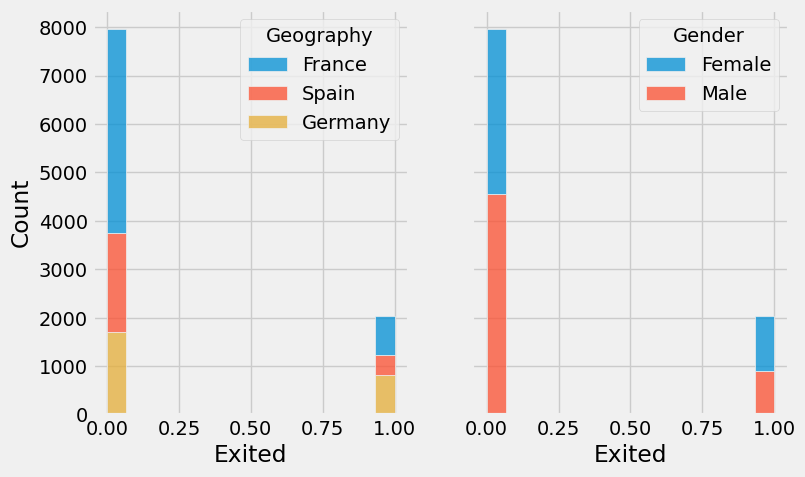

In [8]:
fig, axs = plt.subplots(1,2, figsize=(8,5), sharey=True)

sns.histplot(df, x = df['Exited'], hue = 'Geography', multiple='stack', ax=axs[0])
sns.histplot(df, x = df['Exited'], hue = 'Gender', multiple='stack', ax=axs[1])
plt.show()

/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = gro

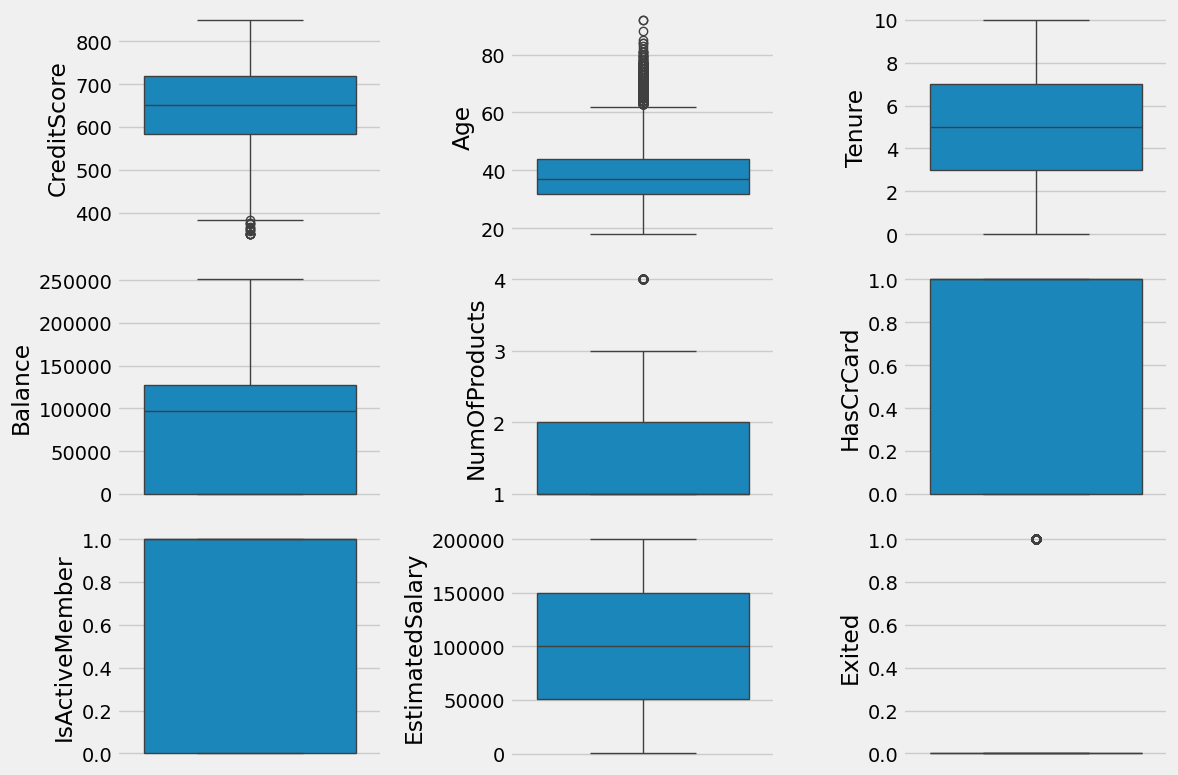

In [9]:
numerical_cols = df.select_dtypes(include=('number')).columns

fig, axs = plt.subplots(3, 3, figsize=(12, 8))

count = 0
for num_col in numerical_cols:
    row = count // 3
    col = count % 3
    sns.boxplot(data=df, y=num_col, ax=axs[row, col])
    count += 1

plt.tight_layout()
plt.show()

# Investigate Relationships

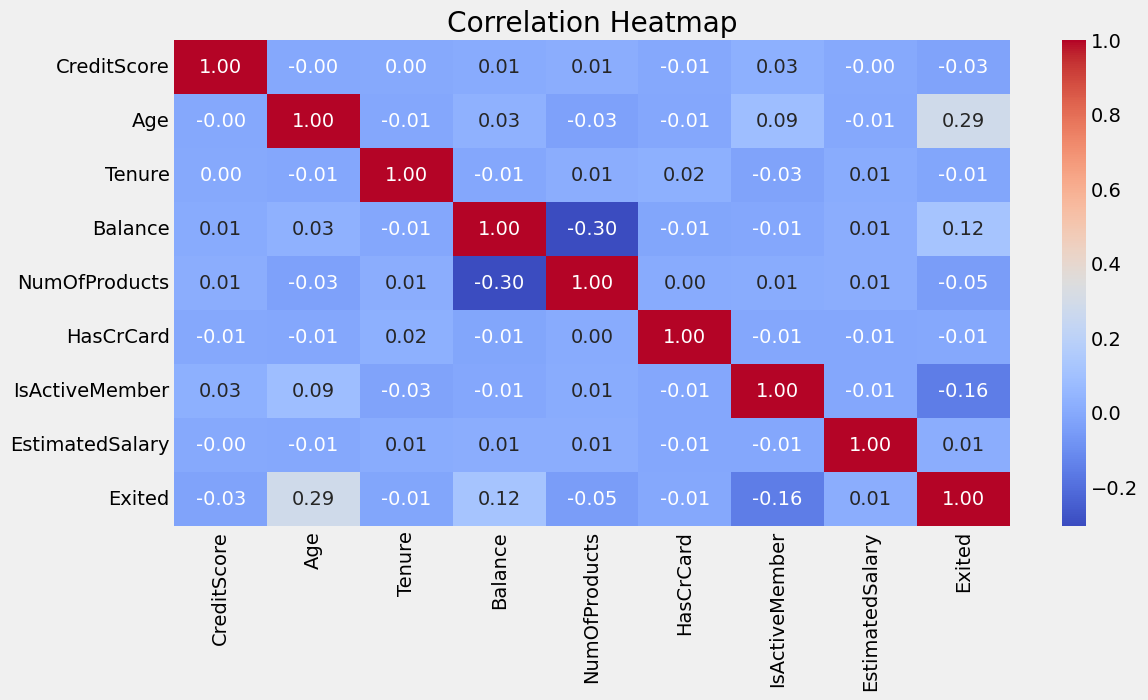

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', fmt=".2f", annot=True)
plt.title('Correlation Heatmap')
plt.show()

/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/janstein/anaconda3/envs/myenv1/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/

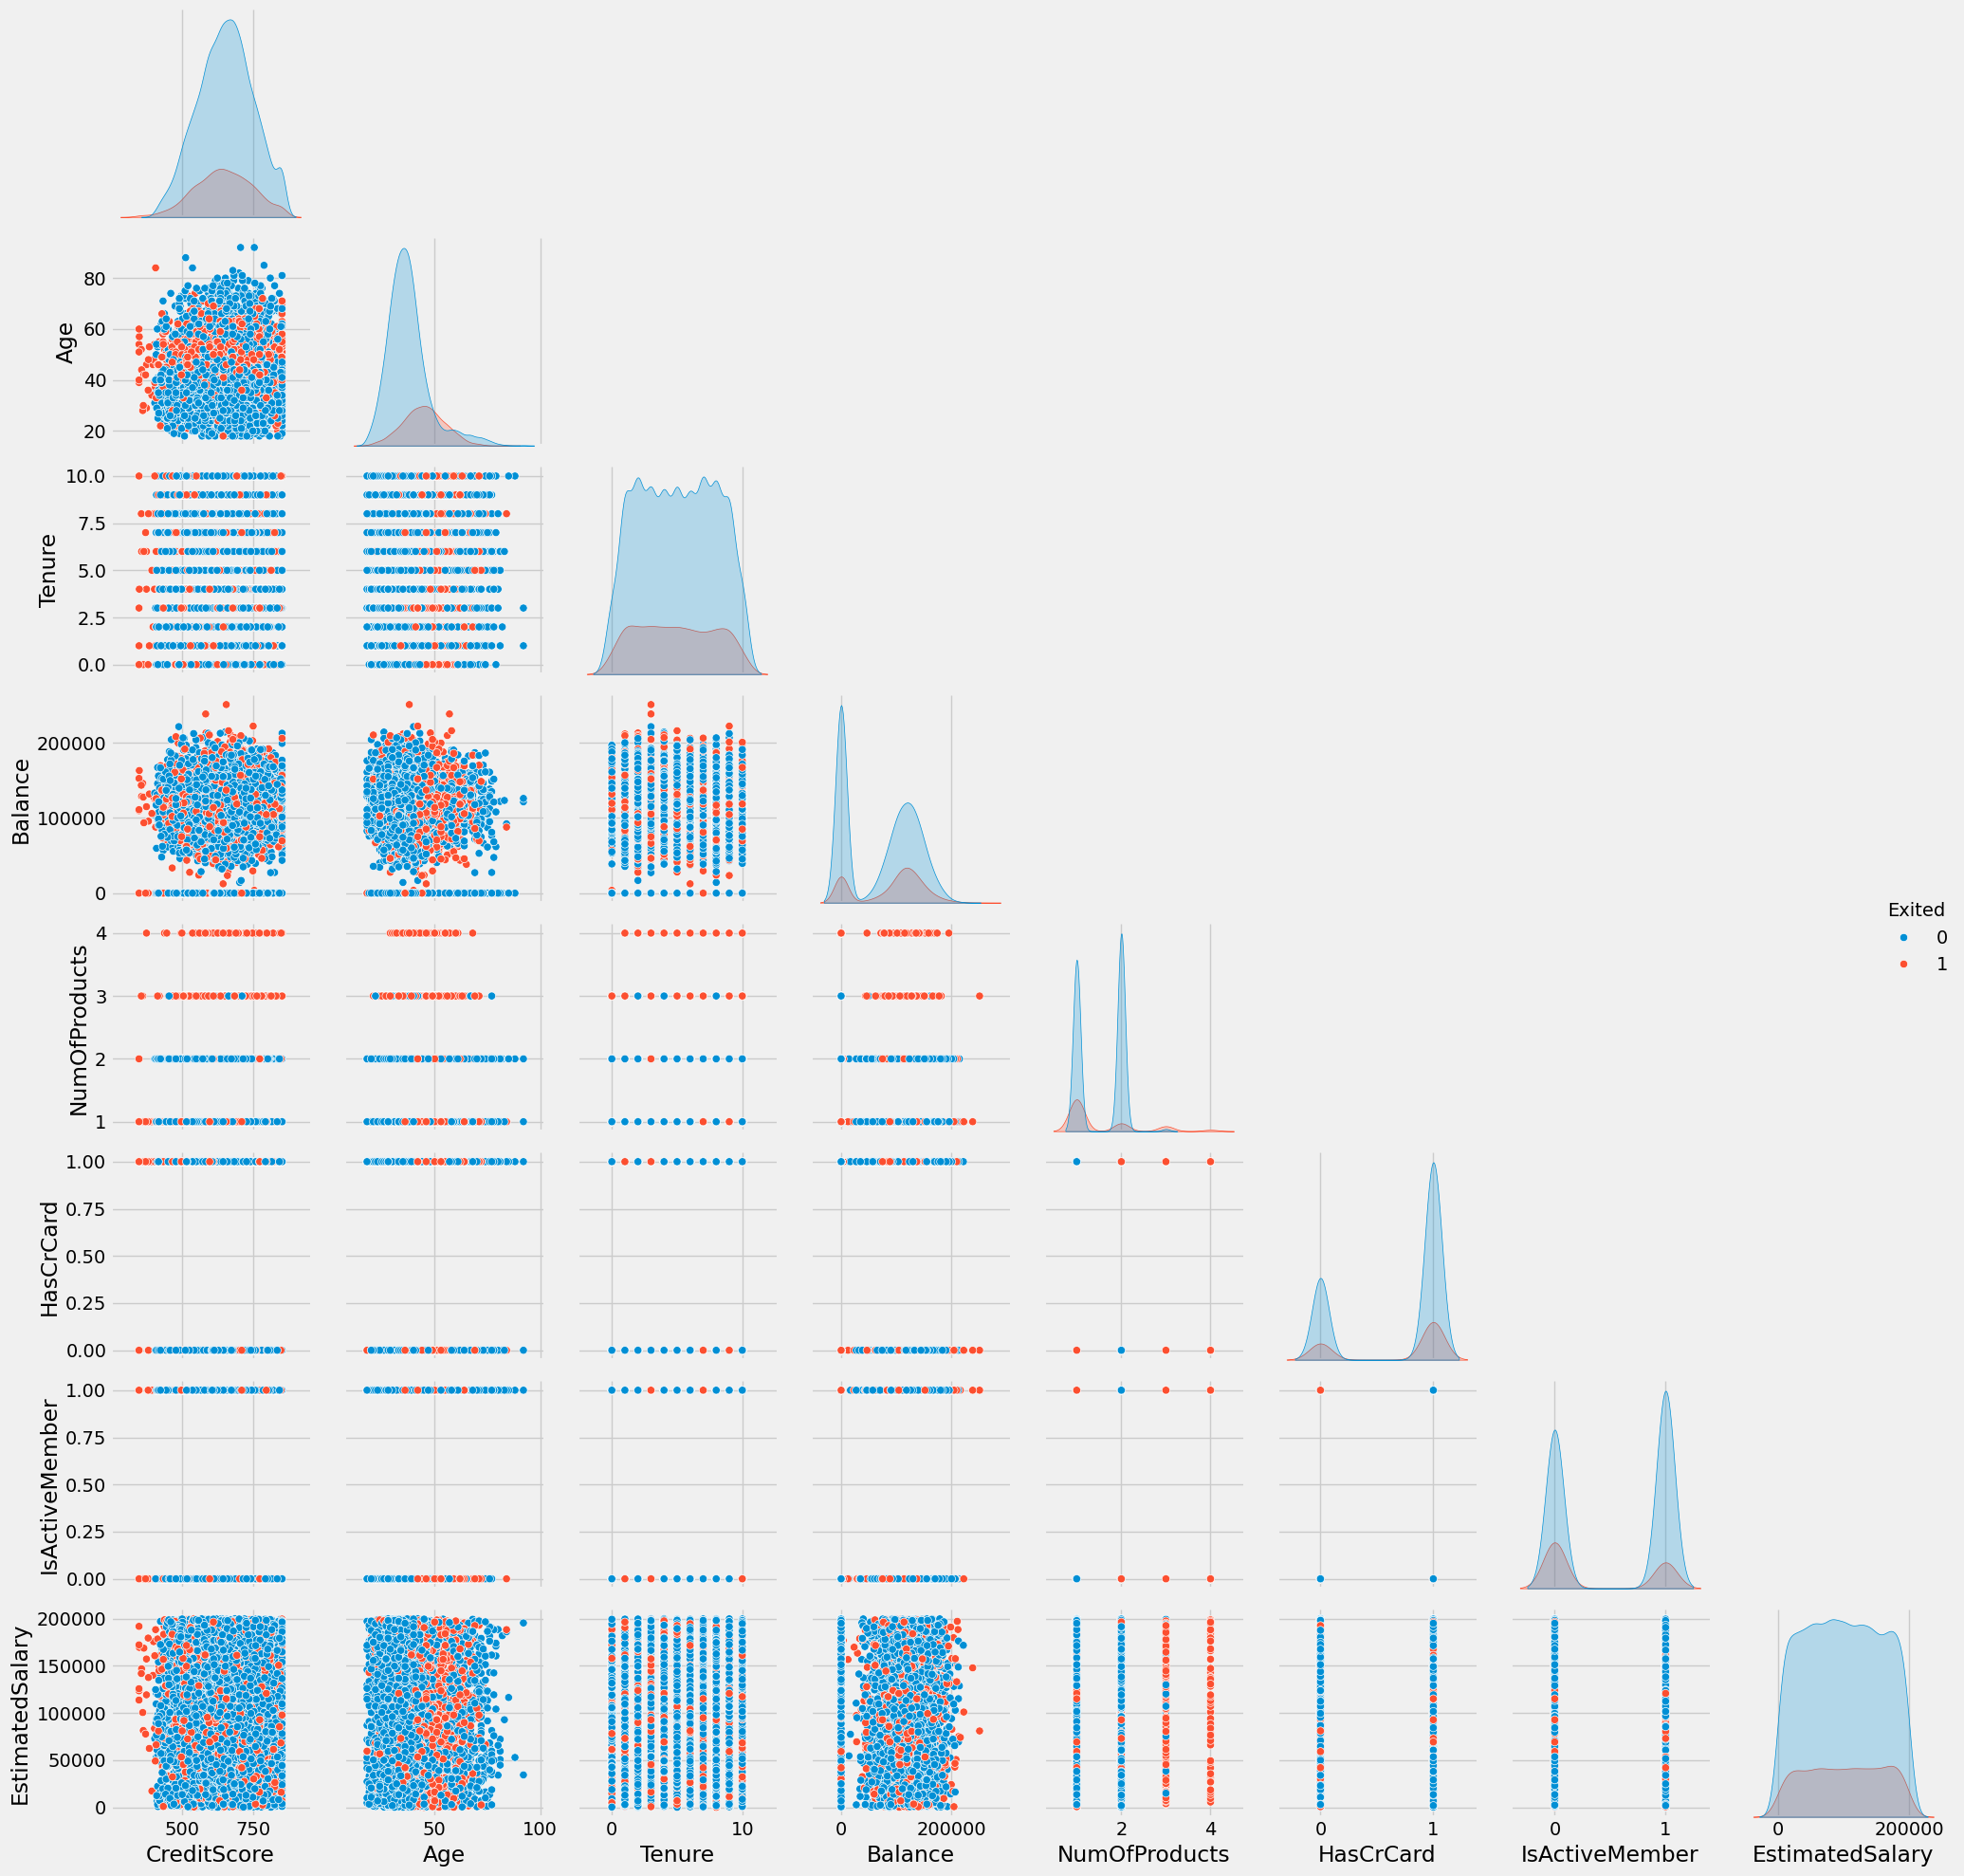

In [11]:
sns.pairplot(df, hue='Exited', corner=True)
plt.tight_layout()

# Preprocessing

Before I can feed my dataset into an ANN, I need to do some preprocessing. This involves encoding my categorical variables and scaling my numerical variables.

Normally when using OneHotEncoder for e.g. linear models I would drop one of the resulting columns for a variable to avoid multicollinearity issues. But due to their nonlinear nature, ANN's are quite adept at dealing with multicollinearity issues. Therefore I'd rather maintain as much information as possible at this point.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
scaler = StandardScaler()

binary_df = df[['HasCrCard', 'IsActiveMember', 'Exited']]
numerical = df.drop(['HasCrCard', 'IsActiveMember', 'Exited'], axis=1).select_dtypes(include=('number'))
categorical = df.select_dtypes(include=('category', 'object'))

# encoding categorical variables and converting into a df
categorical_encoded = encoder.fit_transform(categorical).toarray()
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical.columns))

# scaling numerical variables and converting into a df
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical.columns)

preprocessed_df = pd.concat([categorical_encoded_df, numerical_scaled_df, binary_df], axis=1)

preprocessed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Geography_France,10000.0,5.014000e-01,0.500023,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,10000.0,2.509000e-01,0.433553,0.000000,0.000000,0.000000,1.000000,1.000000
Geography_Spain,10000.0,2.477000e-01,0.431698,0.000000,0.000000,0.000000,0.000000,1.000000
Gender_Female,10000.0,4.543000e-01,0.497932,0.000000,0.000000,0.000000,1.000000,1.000000
Gender_Male,10000.0,5.457000e-01,0.497932,0.000000,0.000000,1.000000,1.000000,1.000000
CreditScore,10000.0,-4.824585e-16,1.000050,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.318146e-16,1.000050,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.078249e-16,1.000050,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-6.252776e-17,1.000050,-1.225848,-1.225848,0.331964,0.819920,2.795323
NumOfProducts,10000.0,1.634248e-17,1.000050,-0.911583,-0.911583,-0.911583,0.807737,4.246377


In [13]:
from sklearn.model_selection import train_test_split

X = preprocessed_df.drop(['Exited'], axis=1)
y = preprocessed_df['Exited']

# splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# second split to create a validation set for my model training 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



# Creating the Model
- **Define the Architecture**: Decide the number of layers and neurons in each layer. Start with a simple model (e.g., two hidden layers) and increase complexity as needed.
- **Choose Activation Functions**: Typically, 'relu' is used for hidden layers, and 'sigmoid' or 'softmax' for the output layer, depending on whether it's a binary or multi-class classification.
- **Initialize the Model:** Use Sequential() in TensorFlow to create a linear stack of layers.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
input_dim = len(X_train.columns)

# Initializing the model
model = Sequential()

# adding layers
model.add(Dense(64, input_dim=input_dim, activation='relu'))  # First hidden layer
model.add(Dropout(0.5))                                       # Adding dropout for regularization to prevent overfitting
model.add(Dense(32, activation='relu'))                       # Second hidden layer
model.add(Dense(1, activation='sigmoid'))                     # Output layer, 1 neuron with Sigmoid activation for binary output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-01-24 20:50:38.571229: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-24 20:50:38.571250: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-24 20:50:38.571256: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-24 20:50:38.571321: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-24 20:50:38.571368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Training the Model
- **Compile the Model**: Use model.compile() to set the optimizer, loss function, and metrics.
- **Train:** Use model.fit() on your training data (X_train, y_train), setting a reasonable number of epochs and batch size. Include validation_data=(X_val, y_val) to use your validation set.

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/100


2024-01-24 20:50:39.070764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 6s 10ms/step - loss: 0.4876 - accuracy: 0.7805 - val_loss: 0.4398 - val_accuracy: 0.8006
Epoch 2/100
200/200 [==============================] - 2s 9ms/step - loss: 0.4556 - accuracy: 0.8003 - val_loss: 0.4372 - val_accuracy: 0.8000
Epoch 3/100
200/200 [==============================] - 2s 9ms/step - loss: 0.4470 - accuracy: 0.8037 - val_loss: 0.4332 - val_accuracy: 0.8119
Epoch 4/100
200/200 [==============================] - 2s 9ms/step - loss: 0.4519 - accuracy: 0.8058 - val_loss: 0.4359 - val_accuracy: 0.8119
Epoch 5/100
200/200 [==============================] - 2s 11ms/step - loss: 0.4564 - accuracy: 0.8042 - val_loss: 0.4583 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 2s 11ms/step - loss: 0.4643 - accuracy: 0.8033 - val_loss: 0.4360 - val_accuracy: 0.8206
Epoch 7/100
200/200 [==============================] - 2s 11ms/step - loss: 0.4825 - accuracy: 0.8025 - val_loss: 0.4317 - val_accuracy: 0.8112
Epoch 8

# Hyperparameter Tuning
- **Manual Tuning**: Adjust hyperparameters based on model performance and retrain. Focus on learning rate, layer sizes, and regularization techniques.
- **Automated Tuning**: Consider using tools like Keras Tuner or GridSearchCV for systematic hyperparameter optimization.

In [17]:
# automating the tuning of hyperparameters with Grid Search
import time
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(learning_rate=0.001, optimizer='adam', neurons1=32, neurons2=16, neurons3=8, hidden_layers=2):
    if optimizer == 'adam':
        opt = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate)

    model = Sequential()
    model.add(Dense(neurons1, input_dim=13, activation='relu'))
    model.add(Dropout(0.5))

    if hidden_layers >= 2:
        model.add(Dense(neurons2, activation='relu'))
    if hidden_layers >= 3:
        model.add(Dense(neurons3, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__neurons1': [32, 64, 128],
    'model__neurons2': [16, 32, 64],
    'model__neurons3': [8, 16, 32],
    'model__hidden_layers': [1, 2, 3],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

start_time = time.time()    # keeping track of GridSearchCV runtime duration

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

end_time = time.time()
duration_seconds = end_time - start_time
hours = duration_seconds // 3600
minutes = (duration_seconds % 3600) // 60
seconds = duration_seconds % 60

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f"The GridSearchCV runtime was: {int(hours)}h {int(minutes)}m {int(seconds)}s")

IndentationError: unexpected indent (187841887.py, line 7)

# Model Evaluation
- **Use Test Set**: Evaluate the final model on X_test and y_test using model.evaluate().
- **Metrics**: Consider accuracy, precision, recall, F1-score, ROC curve, etc., depending on your problem's specifics.
- **Cross-validation**: Optionally, use cross-validation for a more robust evaluation.

Confusion Matrix: Evaluate performance in terms of true positives, false positives, true negatives, and false negatives.

ROC Curve and AUC: Useful for understanding the trade-off between true positive rate and false positive rate.

Precision, Recall, F1-Score: Provides a more nuanced view than accuracy, especially if the data is imbalanced.

# Checking Feature Importance
- **ANNs and Feature Importance**: Unlike some models (like decision trees), ANNs don’t provide a straightforward way to assess feature importance.
- **Techniques to Use**: Consider methods like permutation feature importance, or SHAP (SHapley Additive exPlanations).
- **Alternative Approach**: Train simpler models (like Random Forest) alongside your ANN for comparative feature importance analysis.